## Logistic Regression using Gradient Descent 

In this notebook we use the concepts from Example 1.5.2 (pg.25) & Example 5.2.16 (pg.136) in the textbook to build a e-mail spam classifier.

In [1]:

# This block of code activates the right project environment 
# and the required packages 
using Pkg
Pkg.activate(".")
using CSV
using DataFrames
using PyPlot

  Activating project at `~/Documents/CODE/ACN6348-lab`


### Loading the Dataset

In [2]:
path = joinpath(pwd(),"data","spam.csv")
spam = CSV.read(path,DataFrame)
first(spam,4) # show only first four rows

,crl.tot,dollar,bang,money,n000,make,yesno
,Int64,Float64,Float64,Float64,Float64,Float64,String1
1,278,0.0,0.778,0.0,0.0,0.0,y
2,1028,0.18,0.372,0.43,0.43,0.21,y
3,2259,0.184,0.276,0.06,1.16,0.06,y
4,191,0.0,0.137,0.0,0.0,0.0,y


#### Dataset Description 

- `crl.tot`: total length of uninterrupted sequences of capitals
- `dollar`: Occurrences of the dollar sign, as percent of total number of characters
- `bang`: Occurrences of ‘!’, as percent of total number of characters
- `money`: Occurrences of ‘money’, as percent of total number of words
- `n000`: Occurrences of the string ‘000’, as percent of total number of words
- `make`: Occurrences of ‘make’, as a percent of total number of words
- `yesno`: outcome variable, a factor with levels n not spam, y spam

The next step in our workflow is separate the input patter $\mathbf{S}$ from the target variable $y$

In [3]:
S = select(spam, Not(:yesno)) |> Matrix
y = spam.yesno .== "y";

### Probability Model

A logistic regression probability model is given by the formula:

$$\ddot{p}(s,\theta) = {[1 + \exp(-\ddot{y}(s,\theta))]}^{-1}$$

In [4]:
phat(S,θ) = (1 .+ exp.(-yhat(S,θ))).^-1

phat (generic function with 1 method)

where 
$$\ddot{y}(s,\theta) = \theta^T {[s^T 1]}^T$$

In [5]:
yhat(S,θ) = [S ones(length(y))]*θ

yhat (generic function with 1 method)

### Objective Function

The cost function $c$ is chosen such that 

$$c([y,s],\theta) = -y log\ddot{p}(s,\theta) - (1 -y)log(1-\ddot{p}(s,\theta))$$

In [6]:
c(y,S,θ) =(-y .* log.(phat(S,θ))) - ((1 .- y) .* log.(1 .- phat(S,θ)))

c (generic function with 1 method)

and loss function $$l_n(\theta) = -(1/n) \Sigma_{i=1}^n c([y_i,s_i],\theta)$$

In [7]:
lₙ(θ) = 1/n * sum(c(y,S,θ))

lₙ (generic function with 1 method)

### Gradient 

Refer to Example 5.2.16 (pg.136) for more details on taking the derivatives of logistic regression objective function.

$$\frac{dc_i}{d\mathbf{\theta}} = -(y_i - \ddot{y_i})[s_i^T, 1]$$

In [8]:
∇c(θ) = vec(-(y -yhat(S,θ))' *[S ones(length(y))])

∇c (generic function with 1 method)

### Gradient Descent Algorithm 

Implementing a supervised learning gradient descent using Algorithm 1.5.1 (pg.23)

In [9]:
function gradient_descent(θ;max_iter = 200, gamma = 0.1)
    gradhist = []
    t = 0 
    gradnorm = Inf 
    while gradnorm >= 10e-4 && t < max_iter
        gt = ∇c(θ)
        θ = θ .- gamma.*gt
        gradnorm = maximum(abs.(gt))
        t = t+1 
        println("Iterations: $t \t gradnorm = $gradnorm")
        gradhist =[gradhist;gradnorm]
    end
    return θ, gradhist
end

gradient_descent (generic function with 1 method)

Initializing theta 

In [10]:
initialtheta = zeros(size(S)[2]+1);

Now let's run our gradient descent algorithm to find the values that minimize our cost function

In [11]:
thetas, gradhist = gradient_descent(initialtheta,  gamma = 8.8e-10, max_iter=1000);

Iterations: 1 	 gradnorm = 853233.0
Iterations: 2 	 gradnorm = 693862.458139748
Iterations: 3 	 gradnorm = 564256.2618734605
Iterations: 4 	 gradnorm = 458862.7094208881
Iterations: 5 	 gradnorm = 373151.3229503667
Iterations: 6 	 gradnorm = 303453.6169156628
Iterations: 7 	 gradnorm = 246770.57023896367
Iterations: 8 	 gradnorm = 200679.09836747442
Iterations: 9 	 gradnorm = 163192.95709238556
Iterations: 10 	 gradnorm = 132712.66543429135
Iterations: 11 	 gradnorm = 107921.74474957584
Iterations: 12 	 gradnorm = 87765.37625195524
Iterations: 13 	 gradnorm = 71370.00800154306
Iterations: 14 	 gradnorm = 58041.01500891584
Iterations: 15 	 gradnorm = 47197.759870685135
Iterations: 16 	 gradnorm = 38383.819493381416
Iterations: 17 	 gradnorm = 31212.265564573026
Iterations: 18 	 gradnorm = 25384.201691490372
Iterations: 19 	 gradnorm = 20640.802504792075
Iterations: 20 	 gradnorm = 16787.346515438956
Iterations: 21 	 gradnorm = 13649.724902266587
Iterations: 22 	 gradnorm = 11102.1086833

### Visualizing the `gradnorm`

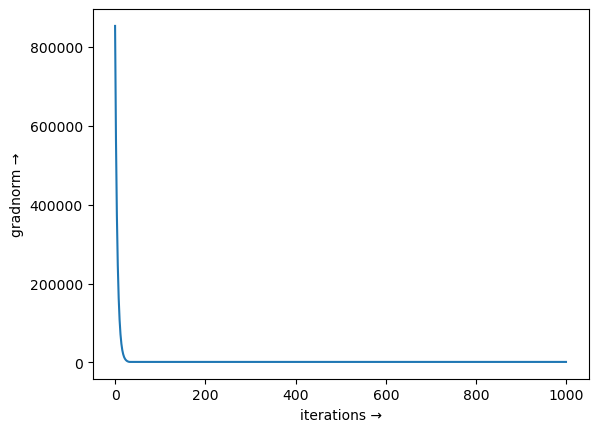

In [12]:
figure()
plot(gradhist)
xlabel("iterations →")
ylabel("gradnorm →");

Learned Parameter

In [13]:
thetas

7-element Vector{Float64}:
 0.0004131426577053251
 0.00019174115833648354
 0.0006602751382952792
 0.0002581528507949046
 0.00028657076523925064
 0.0001654774687355245
 0.0011184817717033173

## Exercise 

1. Re-run the above binary logistic regression example with a dataset of your choice. To run this notebook with your own data, you only need to change two lines of codes:
```julia
path = joinpath(pwd(),"data","spam.csv")
```
If you drop your dataset file in the "data" folder, then you only need to change `spam.csv` part to the your dataset file name. 

The next is specifying your input patterns and the target variable

```julia
S = select(spam, Not(:yesno)) |> Matrix
y = spam.yesno .== "y";
```
Instead of `yesno`, you will specify the column-name in your dataset that corresponds to your outcome variable. 

2. Create a new notebook and implement a simple non-linear regression with radial basis output function. Refer the textbook to implement the objective function and derive its gradient. You can reuse the `gradient_descent` algorithm implementation from this example for the assignment. 